In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import animation
from IPython.display import clear_output
import time
import tensorflow as tf

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (10, 10)

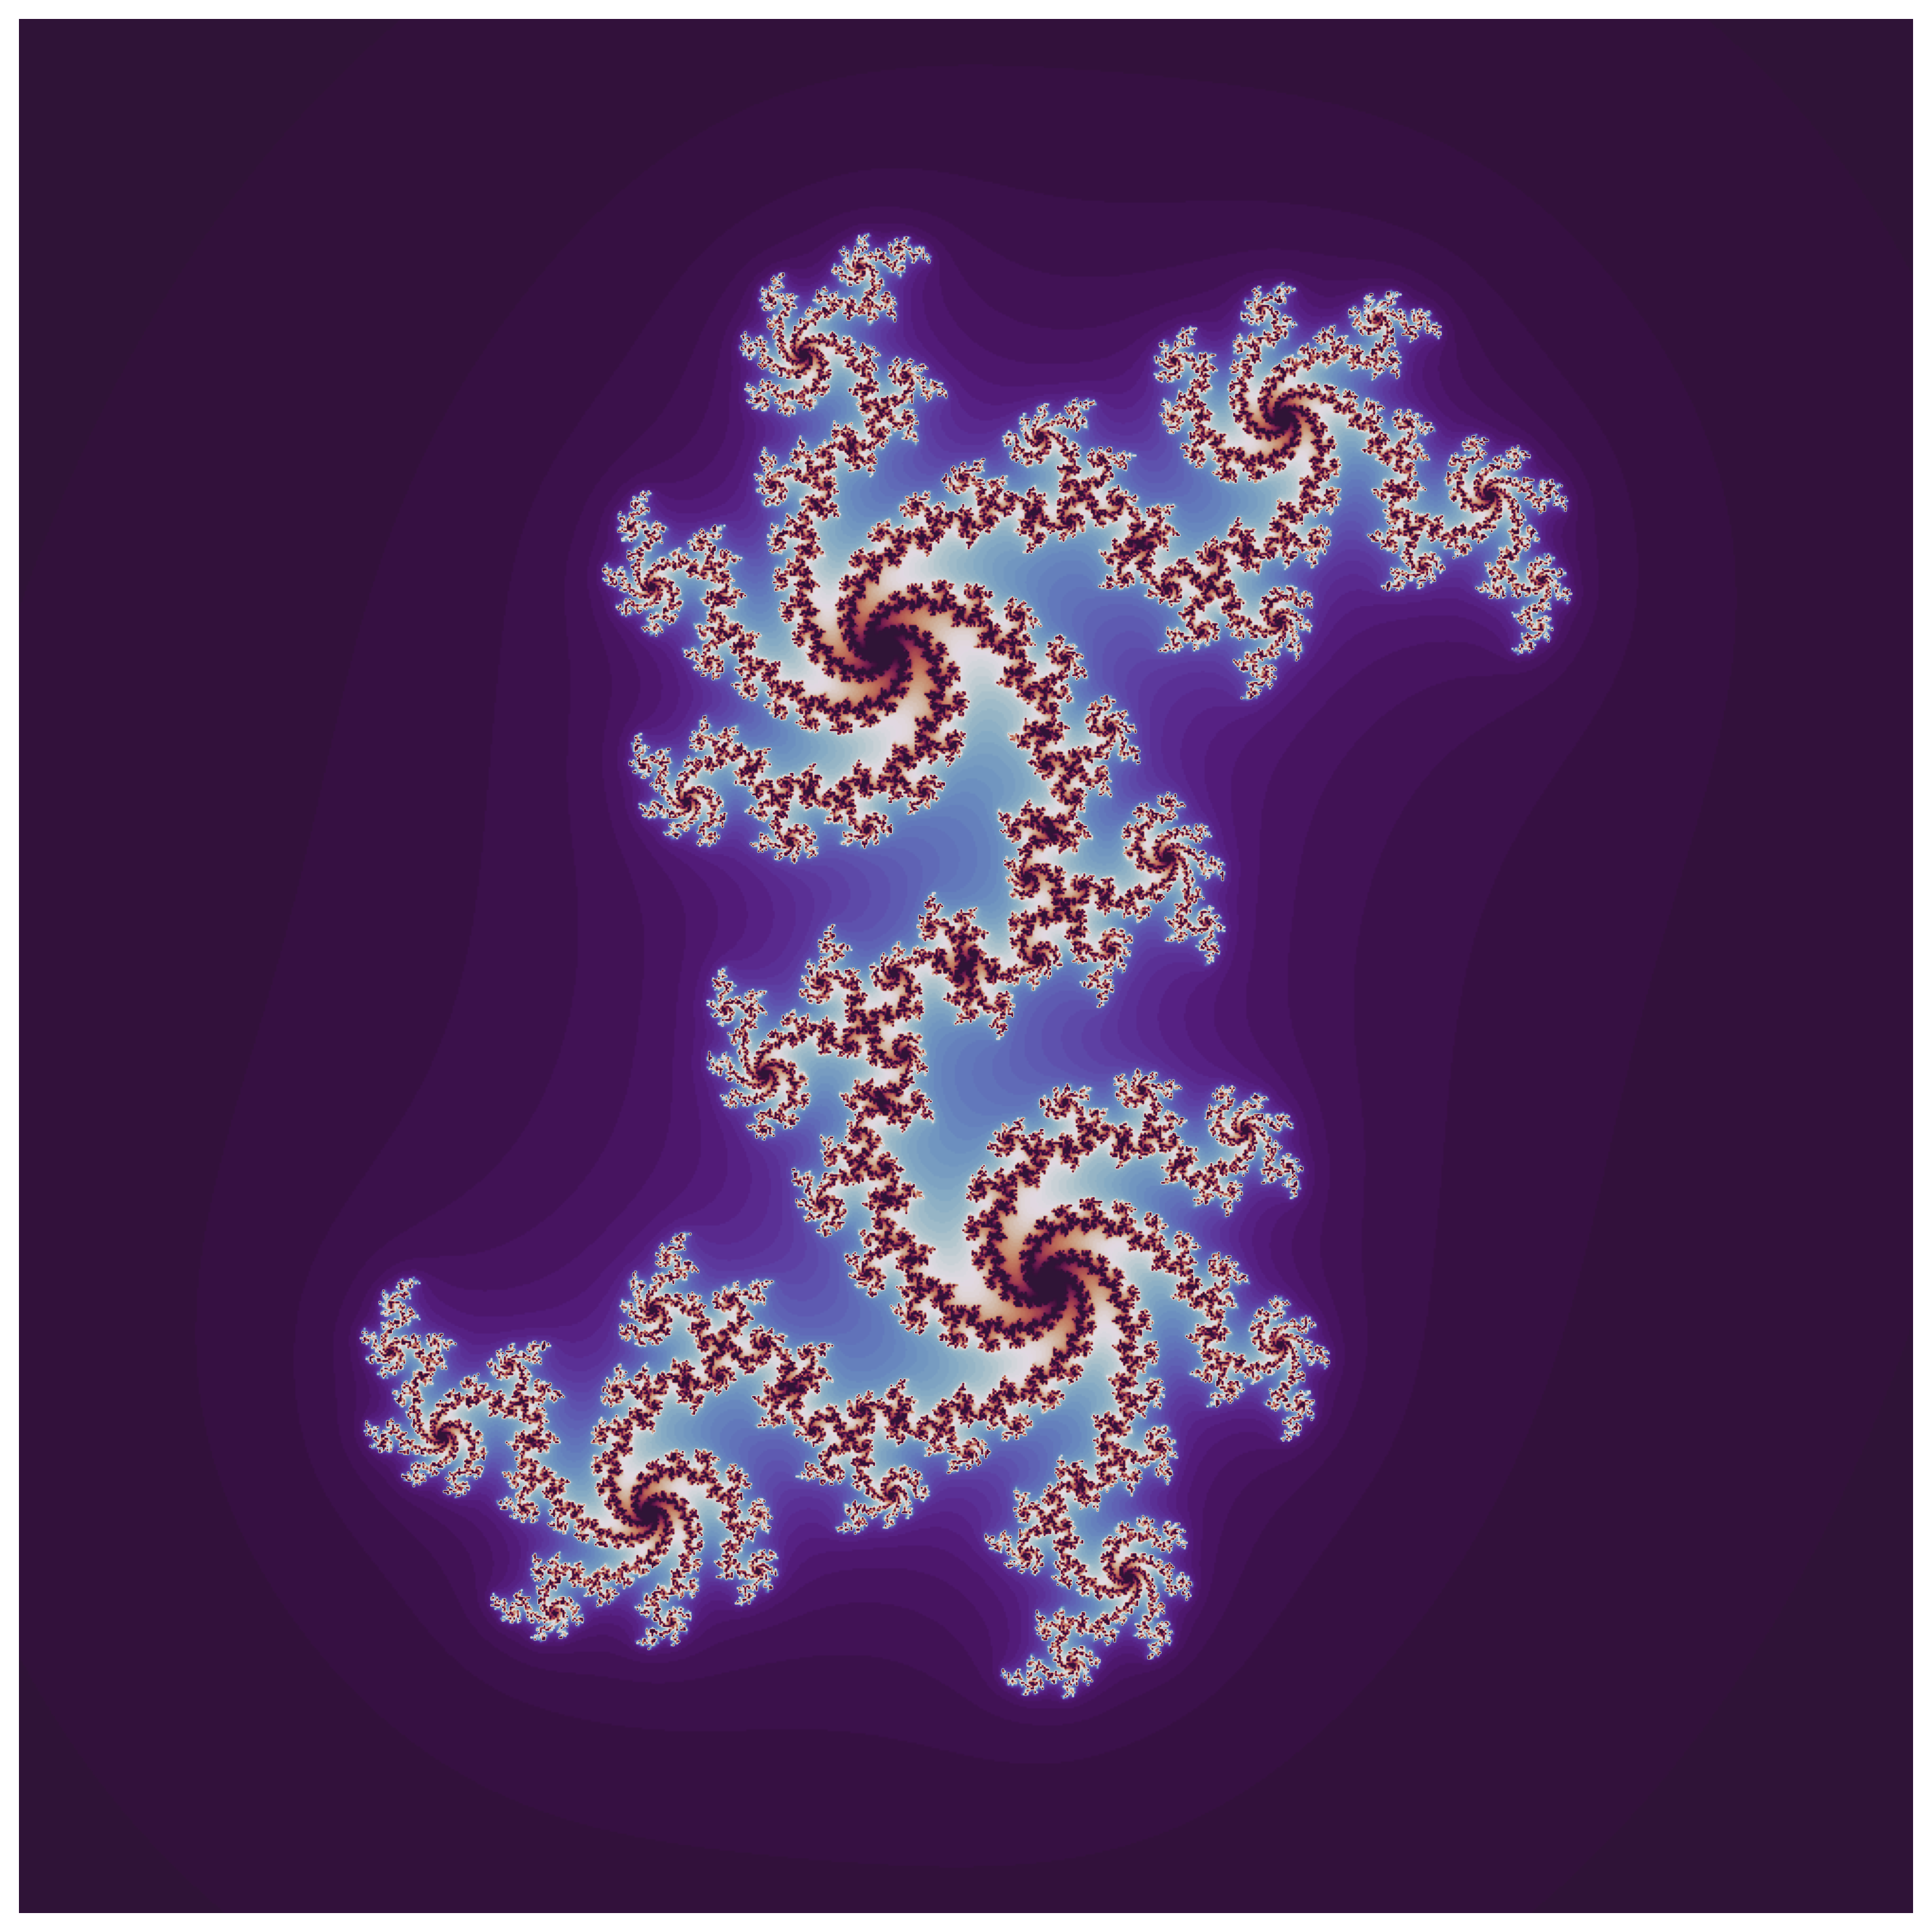

In [5]:
def generate_julia_set(c, z):
    '''
    Generates an image of the Julia set fractal
    
    Arguments:
    c : scalar, dtype complex64
    z : 2d array of the complex plane, dtype complex64
    '''
    with tf.device('CPU:0'):
        z = tf.Variable(z, dtype=tf.complex64)
        out = tf.Variable(tf.zeros(z.shape), tf.float32)
        for i in (range(75)):
            z.assign(tf.add(tf.square(z), c))
            out.assign_add(tf.cast(tf.less(tf.abs(z), 10), tf.float32))
    return out.numpy()

# Animation initialisation function                          
def init():
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)
    fig.patch.set_alpha(0.0)
    return im, text

# Animation function
def update(frame):
    im.set_array(generate_julia_set(c[frame], z))
    text.set_text((f"C = {c[frame]:.2f}"))
    print(f"Animiation is {100*(frame / frames):.1f}% complete!")
    clear_output(wait=True)
    return im, text
                      
# Setting number of frames for the animation                        
frames = 200

# Creating a 1000x1000 array of the complex plane                        
line = np.linspace(-1.5, 1.5, 1000)
x, y = np.meshgrid(line, line)
z = x + 1j*y

# Creating an array of the complex constant to be added to z**2                        
c = (np.linspace(-1.5, 1.5, frames, dtype=np.complex64) 
      + 1j * np.linspace(-1.5, 1.5, frames, dtype=np.complex64))

# Setting up the figure
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
text = ax.text(50, 75, '' , c='white', fontsize=10, weight='bold')
im = plt.imshow(generate_julia_set((0.37+0.37j), z), animated=True, cmap ='twilight_shifted')
                                          
# Creating the animation          
anim = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Rendering and saving the animation
anim.save('julia_set.mp4', fps=30, writer='ffmpeg')